# AlexNet

In [20]:
import torch
import torchvision
import torchvision.transforms as transforms

# Normalise data
transform = transforms.Compose(
    [transforms.Resize(224),
    transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


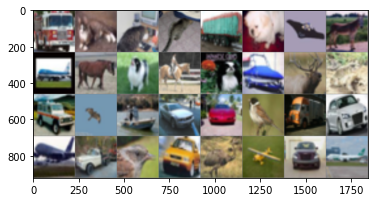

truck   cat   cat   cat


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [21]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 96, 11, stride=4)
        self.conv2 = nn.Conv2d(96, 256, 5, padding=2)
        self.conv3 = nn.Conv2d(256, 384, 3, padding=1)
        self.conv4 = nn.Conv2d(384, 384, 3, padding=1)
        self.conv5 = nn.Conv2d(384, 256, 3, padding=1)
        self.pool = nn.MaxPool2d(3, 2)
        self.fc1 = nn.Linear(5 * 5 * 256, 4096)
        self.fc2 = nn.Linear(4096, 4096)
        self.fc3 = nn.Linear(4096, 10)

    def forward(self, x):
        # Input - 224 * 224
        x = F.relu(self.conv1(x))
        # Output 54 * 54 * 96
        x = self.pool(x)
        # Output 26 * 26 * 96
        x = F.relu(self.conv2(x))
        # Output 26 * 26 * 256
        x = self.pool(x)
        # Output 12 * 12 * 256
        x = F.relu(self.conv3(x))
        # Output 12 * 12 * 384
        x = F.relu(self.conv4(x))
        # Output 12 * 12 * 384
        x = F.relu(self.conv5(x))
        # Output 12 * 12 * 256
        x = self.pool(x)
        # Output 5 * 5 * 256
        x = x.view(-1, 5 * 5 * 256)
        x = F.dropout(F.relu(self.fc1(x)))
        x = F.dropout(F.relu(self.fc2(x)))
        x = self.fc3(x)
        return x

net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 96, kernel_size=(11, 11), stride=(4, 4))
  (conv2): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv3): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=6400, out_features=4096, bias=True)
  (fc2): Linear(in_features=4096, out_features=4096, bias=True)
  (fc3): Linear(in_features=4096, out_features=10, bias=True)
)


In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# device = torch.device("cpu")
# Assuming that we are on a CUDA machine, this should print a CUDA device:
print(device)

net.to(device)
print(net.conv1.bias.get_device())

cpu
-1


In [22]:
import torch.optim as optim

net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001) #, momentum=0.9)
epoch_num = 15
epochs = []
losses = []
for epoch in range(epoch_num):  # loop over the dataset multiple times
    total_loss = 0
    running_loss = 0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

        # print statistics
        running_loss += loss.item()
        if i % 500 == 499:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 500))
            running_loss = 0
    
    epochs.append(epoch)
    losses.append(total_loss / 1563)


torch.Size([32, 256, 5, 5])
torch.Size([32, 256, 5, 5])
torch.Size([32, 256, 5, 5])
torch.Size([32, 256, 5, 5])
torch.Size([32, 256, 5, 5])
torch.Size([32, 256, 5, 5])
torch.Size([32, 256, 5, 5])
torch.Size([32, 256, 5, 5])
torch.Size([32, 256, 5, 5])
torch.Size([32, 256, 5, 5])
torch.Size([32, 256, 5, 5])
torch.Size([32, 256, 5, 5])
torch.Size([32, 256, 5, 5])
torch.Size([32, 256, 5, 5])
torch.Size([32, 256, 5, 5])
torch.Size([32, 256, 5, 5])
torch.Size([32, 256, 5, 5])
torch.Size([32, 256, 5, 5])
torch.Size([32, 256, 5, 5])
torch.Size([32, 256, 5, 5])
torch.Size([32, 256, 5, 5])
torch.Size([32, 256, 5, 5])
torch.Size([32, 256, 5, 5])
torch.Size([32, 256, 5, 5])
torch.Size([32, 256, 5, 5])
torch.Size([32, 256, 5, 5])
torch.Size([32, 256, 5, 5])
torch.Size([32, 256, 5, 5])
torch.Size([32, 256, 5, 5])
torch.Size([32, 256, 5, 5])
torch.Size([32, 256, 5, 5])
torch.Size([32, 256, 5, 5])
torch.Size([32, 256, 5, 5])
torch.Size([32, 256, 5, 5])
torch.Size([32, 256, 5, 5])
torch.Size([32, 256,

KeyboardInterrupt: 

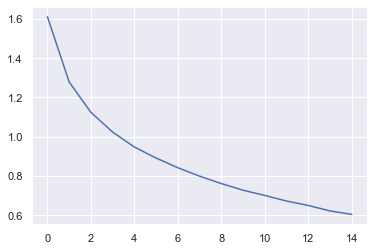

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.plot(epochs, losses)

In [12]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy of the network on the 10000 test images: {correct / total * 100:.1f}%")

Accuracy of the network on the 10000 test images: 67.5%


In [13]:
PATH = './leNet.pth'
torch.save(net.state_dict(), PATH)